# XOR

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 971ms/step - accuracy: 0.5000 - loss: 0.7341
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.2500 - loss: 0.7325
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.2500 - loss: 0.7309
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5000 - loss: 0.7294
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 0.7280
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 0.7266
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.5000 - loss: 0.7253
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5000 - loss: 0.7240
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.7227
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5000 - loss: 0.7215
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.7204
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy

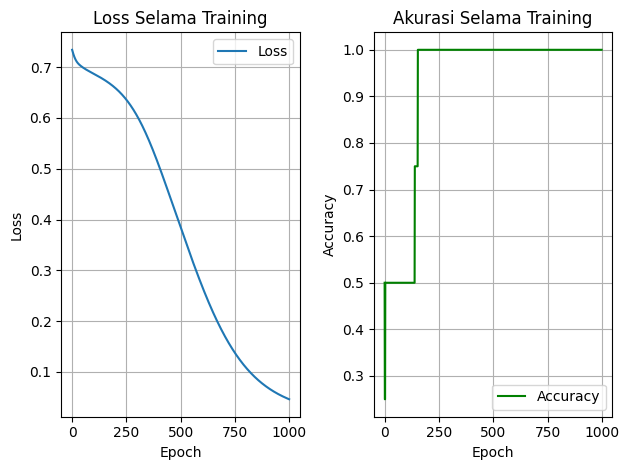

In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Dataset XOR
# Input: kombinasi 2-bit
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Output: XOR
y = np.array([[0],
              [1],
              [1],
              [0]])

# 2. Model jaringan syaraf tiruan
model = Sequential([
    Dense(20, input_dim=2, activation='tanh'),  # hidden layer
    # Dense(3, input_dim=2, activation='tanh'),
    Dense(1, activation='sigmoid')                # output layer
])

# 3. Kompilasi model
# model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['binary_accuracy']) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Pelatihan model
history = model.fit(X, y, epochs=1000, verbose=1)

# 5. Evaluasi hasil
predictions = model.predict(X)
print("Prediksi XOR:")
for i in range(len(X)):
    print(f"{X[i]} -> {predictions[i][0]:.4f}")

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.title('Loss Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Grafik Akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy', color='green')
plt.title('Akurasi Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# IRIS

c:\Users\agung\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 1.0000 - loss: 0.0696

Akurasi pada data uji: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Data: [ 0.31099753 -0.59237301  0.53540856  0.00087755], Prediksi: 1, Label Sebenarnya: 1
Data: [-0.17367395  1.70959465 -1.16971425 -1.18381211], Prediksi: 0, Label Sebenarnya: 0
Data: [ 2.24968346 -1.05276654  1.78583195  1.44883158], Prediksi: 2, Label Sebenarnya: 2
Data: [ 0.18982966 -0.36217625  0.42173371  0.3957741 ], Prediksi: 1, Label Sebenarnya: 1
Data: [ 1.15917263 -0.59237301  0.59224599  0.26414192], Prediksi: 1, Label Sebenarnya: 1


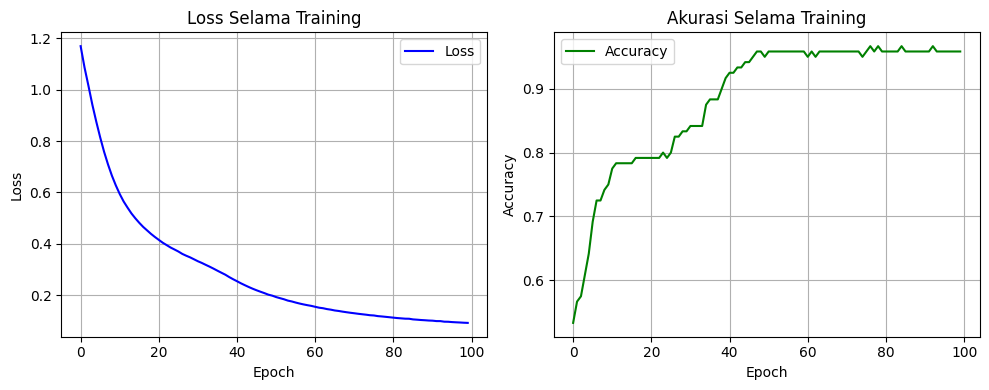

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Load dataset Iris
iris = load_iris()
X = iris.data                 # fitur: 4 kolom
y = iris.target.reshape(-1, 1)  # label: 0, 1, 2

# 2. One-hot encoding label
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# 3. Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 5. Bangun model jaringan syaraf tiruan
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(4,), activation='relu'),  # hidden layer
    tf.keras.layers.Dense(3, activation='softmax')  # output layer untuk 3 kelas
])

# 6. Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 7. Latih model
history = model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=0)

# 8. Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nAkurasi pada data uji: {accuracy:.4f}")

# 9. Contoh prediksi
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Tampilkan beberapa hasil prediksi
for i in range(5):
    print(f"Data: {X_test[i]}, Prediksi: {predicted_classes[i]}, Label Sebenarnya: {true_classes[i]}")

# 9. Plot Loss dan Akurasi selama training
plt.figure(figsize=(10, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss', color='blue')
plt.title('Loss Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy', color='green')
plt.title('Akurasi Selama Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()